In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import os
import tensorflow as tf
from tensorflow import keras

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [2]:
df_hour=pd.read_csv('./datasets/Bikerental/bike.csv')
df_day=pd.read_csv('./datasets/Bikerental/day.csv')

In [3]:
df_hour

,Unnamed: 0,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,1,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,2,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,3,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,4,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,5,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,WINTER,2012,DEC,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114,726
727,728,WINTER,2012,DEC,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095,727
728,729,WINTER,2012,DEC,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341,728
729,730,WINTER,2012,DEC,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796,729


In [4]:
df=df_hour.drop(columns=['Unnamed: 0','mnth','weekday'])
df

,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,NO HOLIDAY,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,NO HOLIDAY,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,NO HOLIDAY,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,NO HOLIDAY,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,NO HOLIDAY,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4
...,...,...,...,...,...,...,...,...,...,...
726,WINTER,2012,NO HOLIDAY,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114,726
727,WINTER,2012,NO HOLIDAY,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095,727
728,WINTER,2012,NO HOLIDAY,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341,728
729,WINTER,2012,NO HOLIDAY,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796,729


In [5]:
df.shape

(731, 10)

In [6]:
df.columns

Index(['season', 'yr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'cnt', 'days_since_2011'],
      dtype='object')

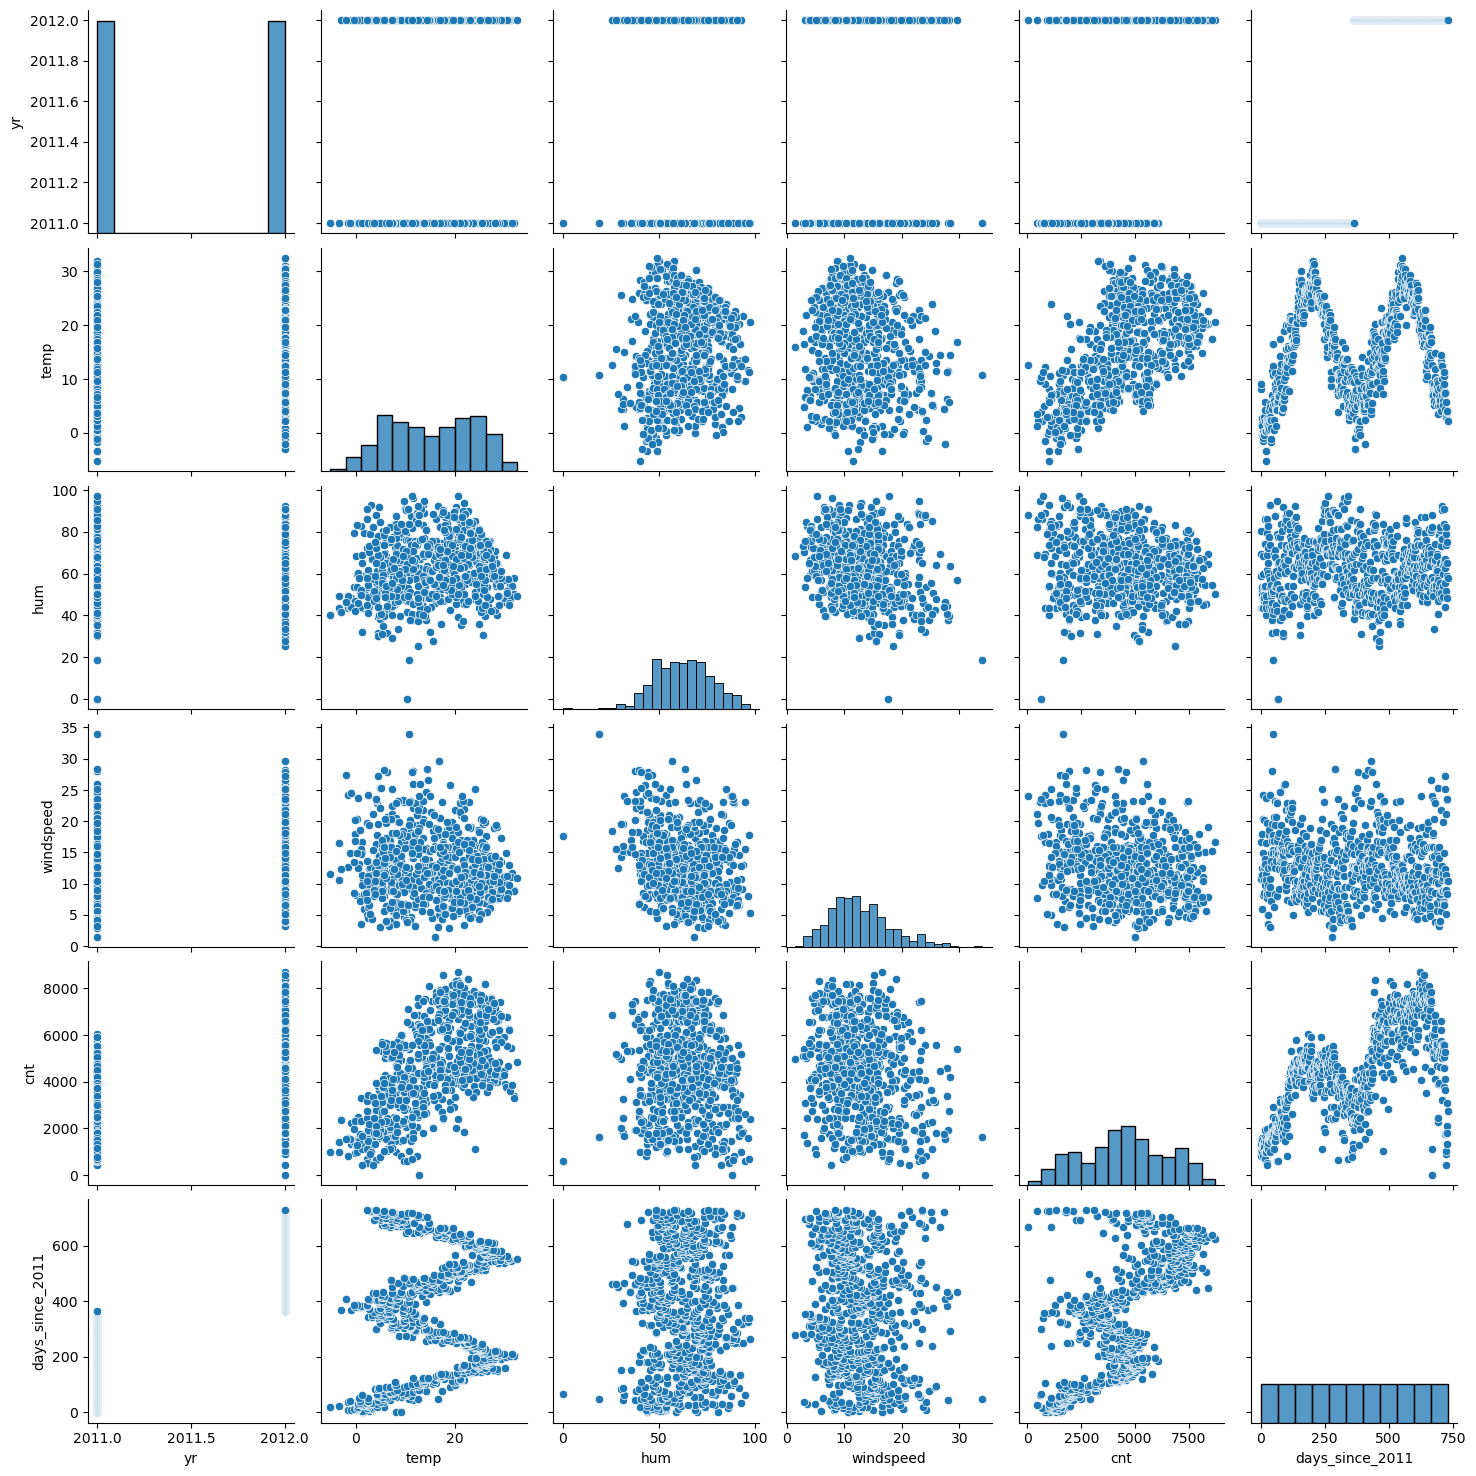

In [7]:
#sns.set_theme(style="ticks")
sns.pairplot(df)

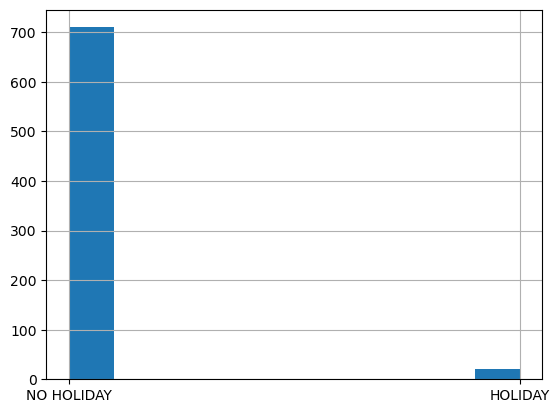

In [8]:
df.holiday.hist()
plt.show()

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,731.0,2011.500684,0.500342,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000
temp,731.0,15.283085,8.603397,-5.220871,7.842925,15.421651,22.804575,32.498349
hum,731.0,62.789406,14.242910,0.000000,52.000000,62.666700,73.020850,97.250000
windspeed,731.0,12.762576,5.192357,1.500244,9.041650,12.125325,15.625371,34.000021
cnt,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000
days_since_2011,731.0,365.000000,211.165812,0.000000,182.500000,365.000000,547.500000,730.000000


In [7]:
df_dum=pd.get_dummies(df, prefix=['season','holiday','workingday','weathersit'])

In [8]:
df_dum.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,731.0,2011.500684,0.500342,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000
temp,731.0,15.283085,8.603397,-5.220871,7.842925,15.421651,22.804575,32.498349
hum,731.0,62.789406,14.242910,0.000000,52.000000,62.666700,73.020850,97.250000
windspeed,731.0,12.762576,5.192357,1.500244,9.041650,12.125325,15.625371,34.000021
cnt,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000
days_since_2011,731.0,365.000000,211.165812,0.000000,182.500000,365.000000,547.500000,730.000000
season_FALL,731.0,0.243502,0.429489,0.000000,0.000000,0.000000,0.000000,1.000000
season_SPRING,731.0,0.251710,0.434293,0.000000,0.000000,0.000000,1.000000,1.000000
season_SUMMER,731.0,0.257182,0.437380,0.000000,0.000000,0.000000,1.000000,1.000000
season_WINTER,731.0,0.247606,0.431917,0.000000,0.000000,0.000000,0.000000,1.000000


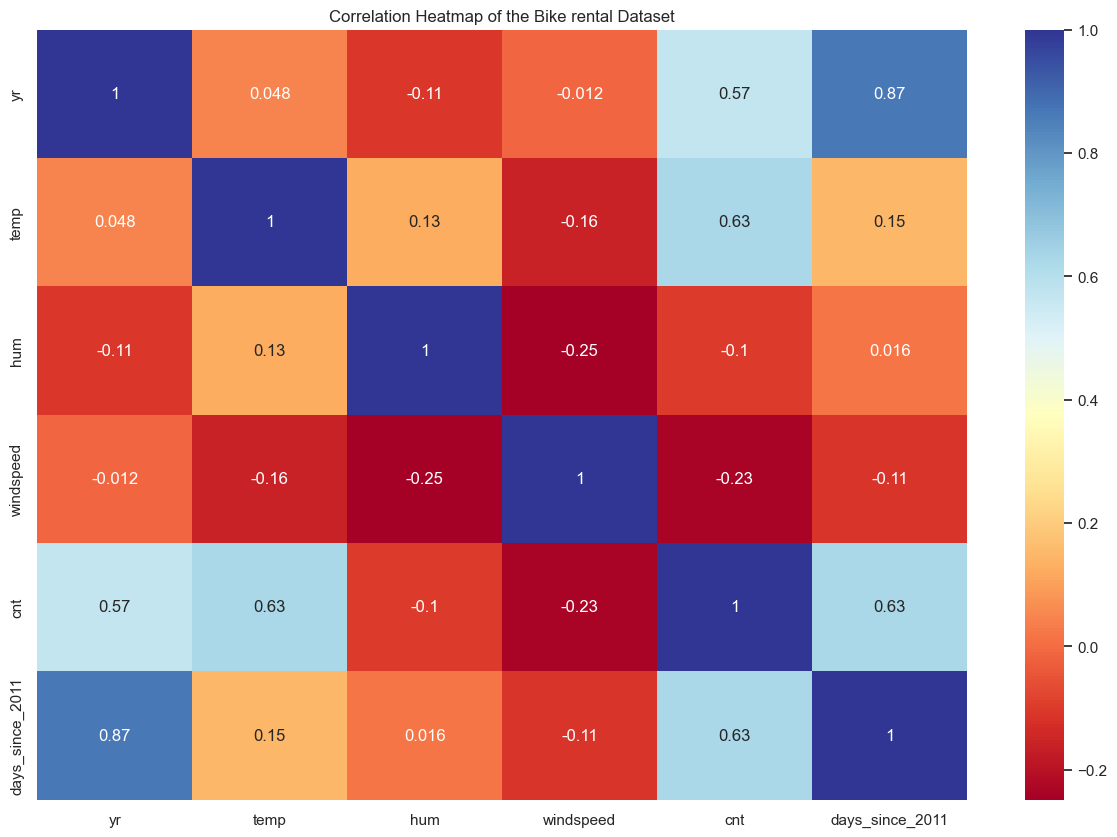

In [63]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,cmap='RdYlBu').set(title='Correlation Heatmap of the Bike rental Dataset')
plt.show()

In [35]:
c = df.corr().abs()

upper_corr_mat = c.where(
    np.triu(np.ones(c.shape), k=1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

windspeed        yr           0.011817
days_since_2011  hum          0.016375
temp             yr           0.047604
cnt              hum          0.100659
hum              yr           0.110651
days_since_2011  windspeed    0.112620
hum              temp         0.126963
days_since_2011  temp         0.150580
windspeed        temp         0.157944
cnt              windspeed    0.234545
windspeed        hum          0.248489
cnt              yr           0.566710
                 temp         0.627494
days_since_2011  cnt          0.628830
                 yr           0.866025
dtype: float64


In [9]:
df_dum=df_dum.drop(columns=['holiday_NO HOLIDAY','workingday_NO WORKING DAY'])

In [10]:
df_dum.rename(columns={"holiday_HOLIDAY": "HOLIDAY", "workingday_WORKING DAY": "WORKING DAY"})

,yr,temp,hum,windspeed,cnt,days_since_2011,season_FALL,season_SPRING,season_SUMMER,season_WINTER,HOLIDAY,WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,2011,8.175849,80.5833,10.749882,985,0,0,0,0,1,0,0,0,1,0
1,2011,9.083466,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0
2,2011,1.229108,43.7273,16.636703,1349,2,0,0,0,1,0,1,1,0,0
3,2011,1.400000,59.0435,10.739832,1562,3,0,0,0,1,0,1,1,0,0
4,2011,2.666979,43.6957,12.522300,1600,4,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012,3.945849,65.2917,23.458911,2114,726,0,0,0,1,0,1,0,1,0
727,2012,3.906651,59.0000,10.416557,3095,727,0,0,0,1,0,1,0,1,0
728,2012,3.906651,75.2917,8.333661,1341,728,0,0,0,1,0,0,0,1,0
729,2012,4.024151,48.3333,23.500518,1796,729,0,0,0,1,0,0,1,0,0


In [15]:
df_dum.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,731.0,2011.500684,0.500342,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000
temp,731.0,15.283085,8.603397,-5.220871,7.842925,15.421651,22.804575,32.498349
hum,731.0,62.789406,14.242910,0.000000,52.000000,62.666700,73.020850,97.250000
windspeed,731.0,12.762576,5.192357,1.500244,9.041650,12.125325,15.625371,34.000021
cnt,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000
days_since_2011,731.0,365.000000,211.165812,0.000000,182.500000,365.000000,547.500000,730.000000
season_FALL,731.0,0.243502,0.429489,0.000000,0.000000,0.000000,0.000000,1.000000
season_SPRING,731.0,0.251710,0.434293,0.000000,0.000000,0.000000,1.000000,1.000000
season_SUMMER,731.0,0.257182,0.437380,0.000000,0.000000,0.000000,1.000000,1.000000
season_WINTER,731.0,0.247606,0.431917,0.000000,0.000000,0.000000,0.000000,1.000000


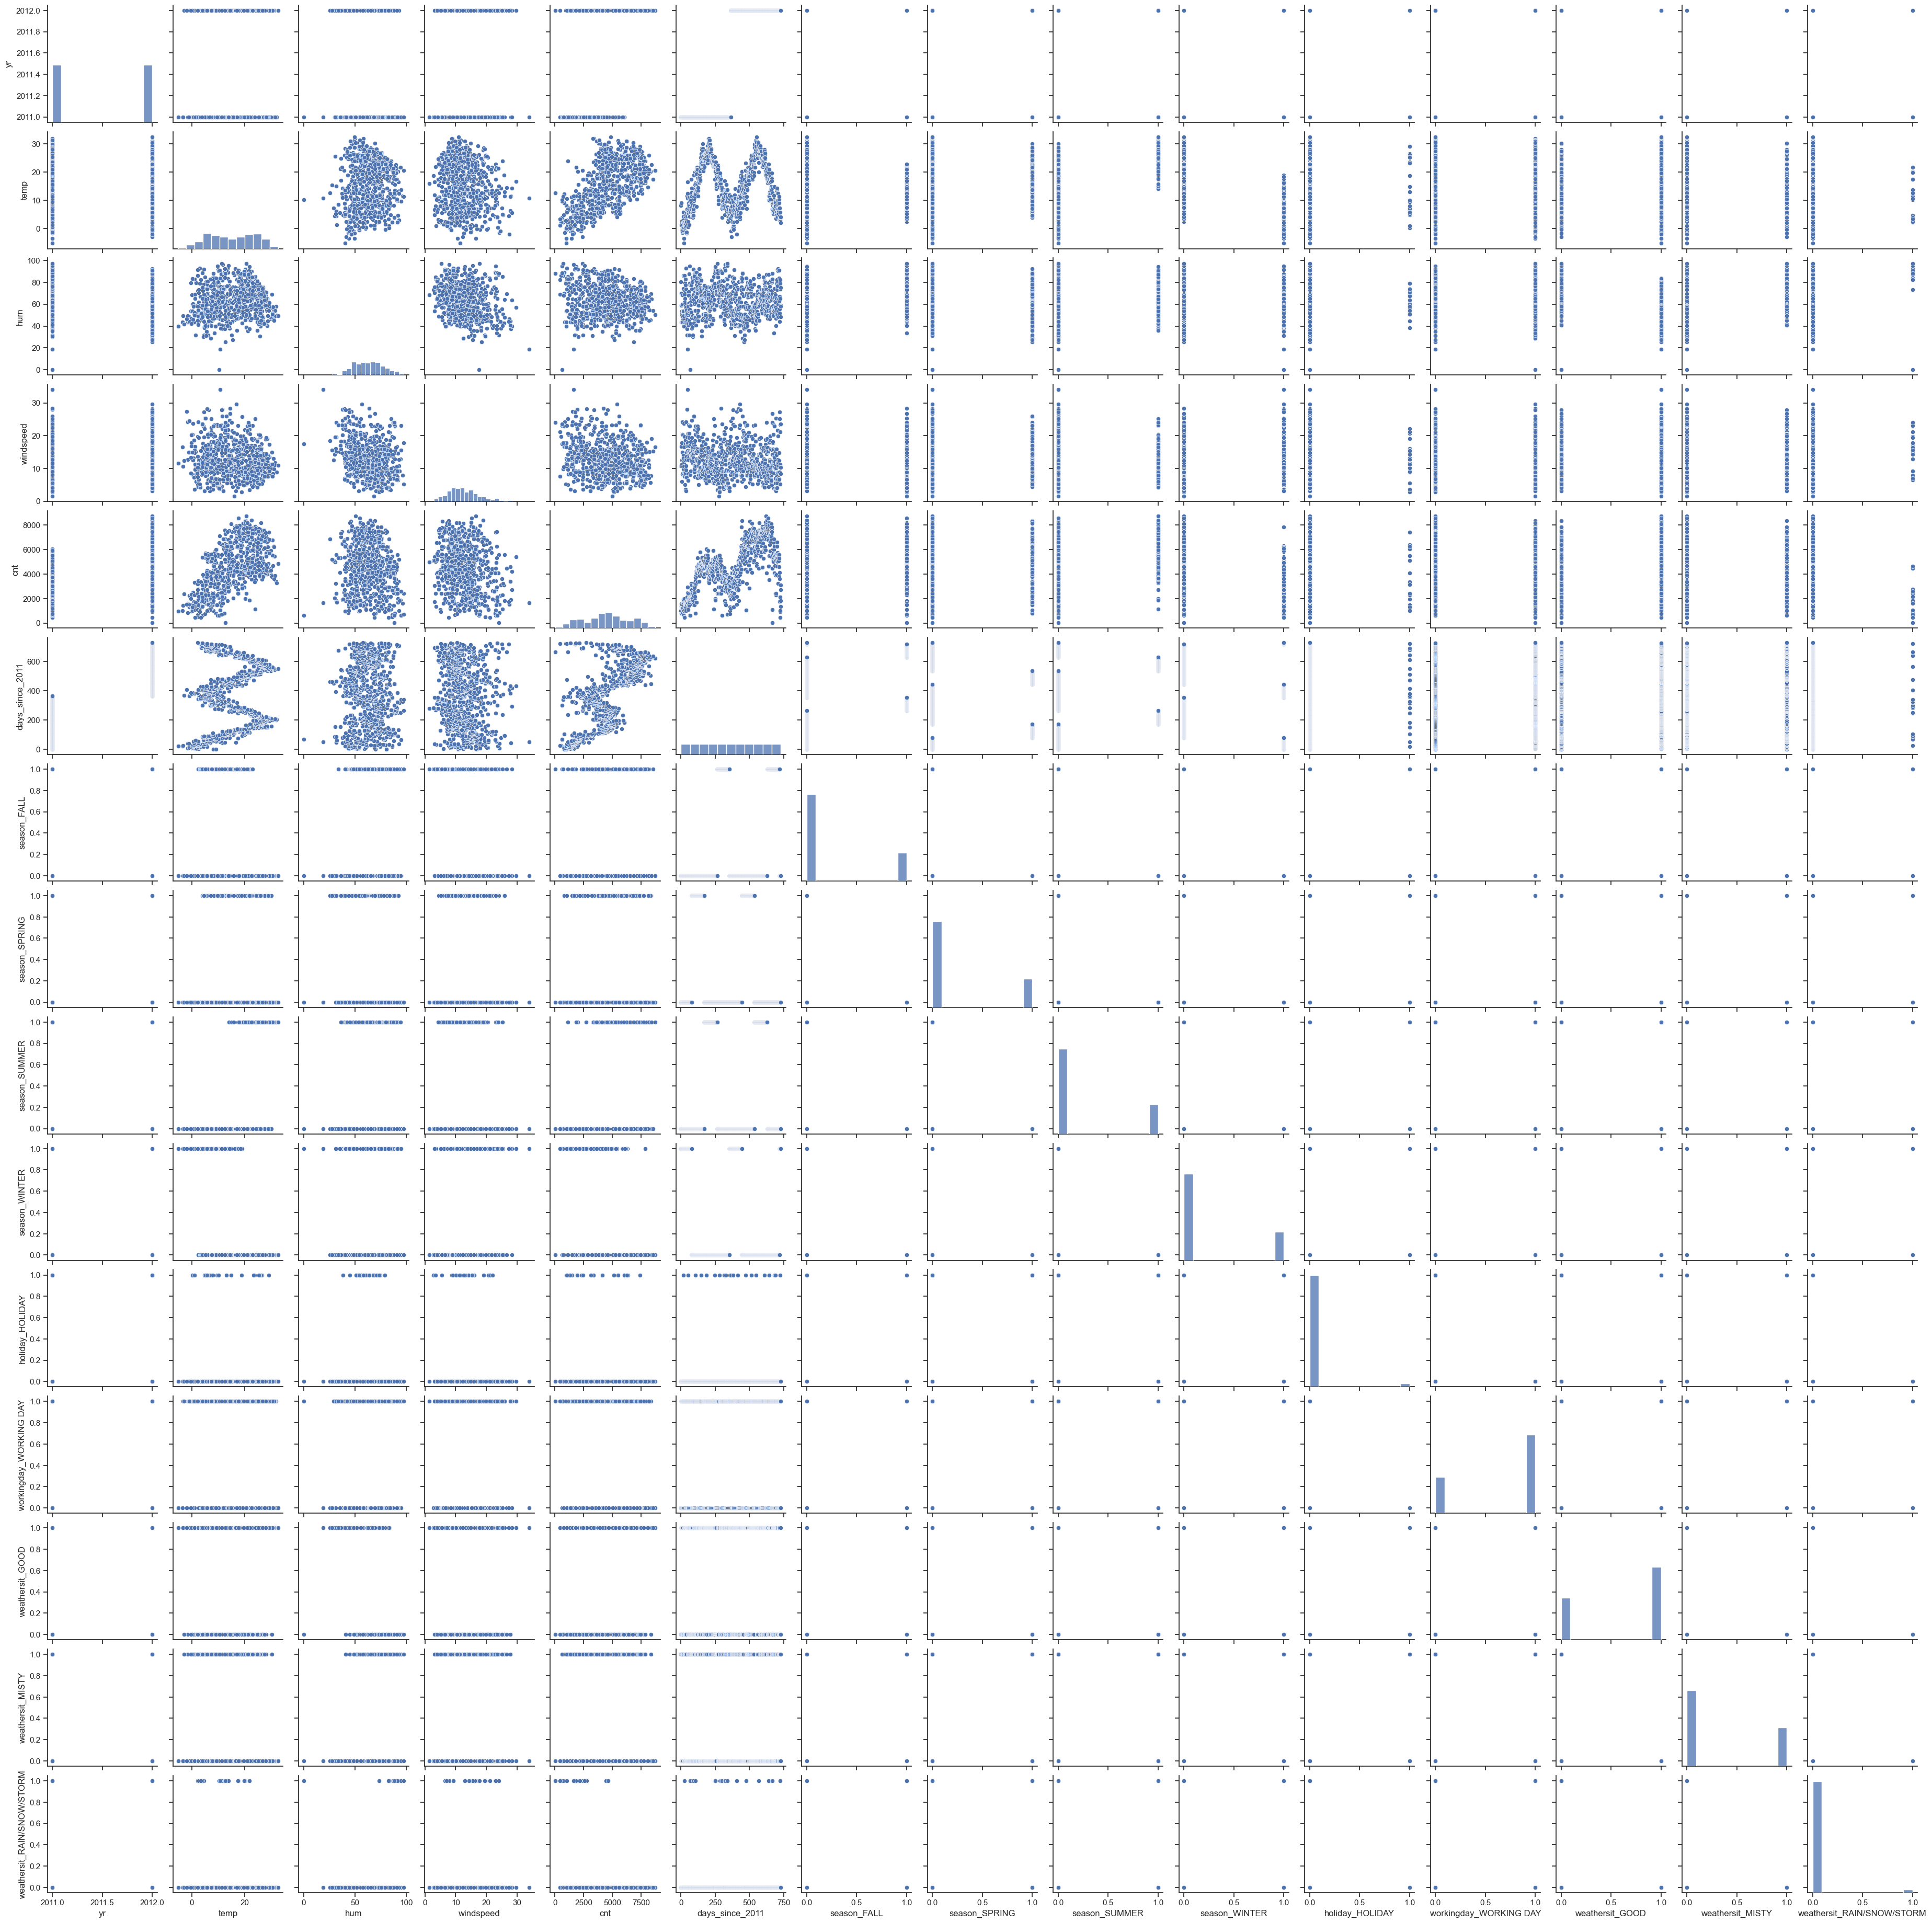

In [16]:
sns.set_theme(style="ticks")
sns.pairplot(df_dum)
plt.show()

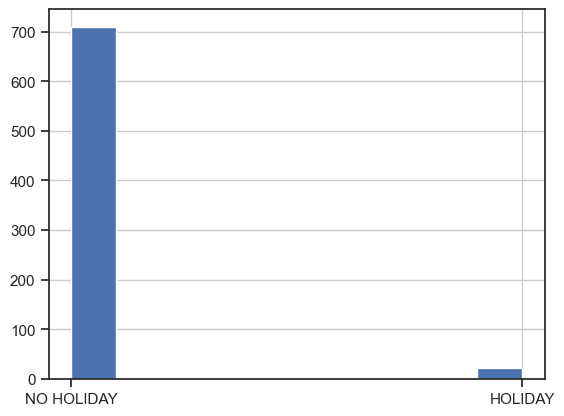

In [17]:
df.holiday.hist()
plt.show()

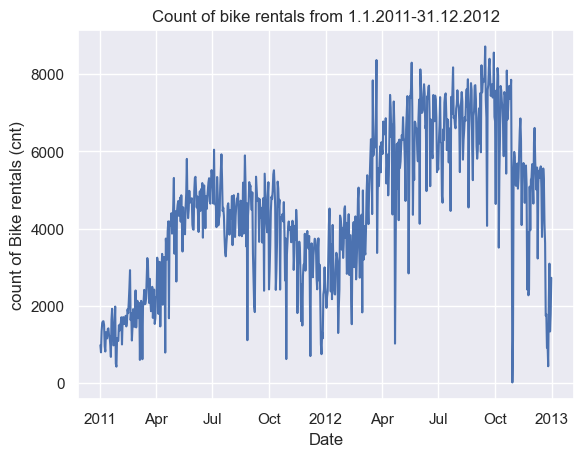

In [62]:
import datetime
xx=df['days_since_2011'].apply(lambda x: datetime.date(2011, 1, 1) + datetime.timedelta(days=x))
import matplotlib.dates as mdates
# same plotting code as above!
import seaborn as sns
# plot distplot
fig, ax = plt.subplots()
sns.set()
sns.lineplot(x=xx,y="cnt",data=df,ax = ax).set(title='Count of bike rentals from 1.1.2011-31.12.2012', xlabel='Date', ylabel='count of Bike rentals (cnt)')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.show()

In [11]:
df_dum.to_csv("bike_data.csv")

In [12]:
df_dum

,yr,temp,hum,windspeed,cnt,days_since_2011,season_FALL,season_SPRING,season_SUMMER,season_WINTER,holiday_HOLIDAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,2011,8.175849,80.5833,10.749882,985,0,0,0,0,1,0,0,0,1,0
1,2011,9.083466,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0
2,2011,1.229108,43.7273,16.636703,1349,2,0,0,0,1,0,1,1,0,0
3,2011,1.400000,59.0435,10.739832,1562,3,0,0,0,1,0,1,1,0,0
4,2011,2.666979,43.6957,12.522300,1600,4,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012,3.945849,65.2917,23.458911,2114,726,0,0,0,1,0,1,0,1,0
727,2012,3.906651,59.0000,10.416557,3095,727,0,0,0,1,0,1,0,1,0
728,2012,3.906651,75.2917,8.333661,1341,728,0,0,0,1,0,0,0,1,0
729,2012,4.024151,48.3333,23.500518,1796,729,0,0,0,1,0,0,1,0,0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_dum is your DataFrame with 731 rows × 15 columns
# Preprocessing
X = df_dum.drop(columns=['cnt'])
y = df_dum['cnt']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLPRegressor model
mlp = MLPRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV and 5-fold cross-validation
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256,),(64,64),(64,64,64),(32,32,32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01,0.1,0.05],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter':[1000]
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
best_mlp = grid_search.best_estimator_

# Model evaluation
y_pred = best_mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R^2 score: {r2:.2f}")



Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (32, 32, 32), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Mean squared error: 578324.32
R^2 score: 0.86


In [21]:
rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse:.2f}")

Root mean squared error: 760.48


In [17]:
import xgboost as xgb

# Define the XGBoost model
xgb_reg = xgb.XGBRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV and 5-fold cross-validation
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_reg, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
best_xgb = grid_search.best_estimator_

# Model evaluation
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"R^2 score: {r2:.2f}")


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean squared error: 346819.87
Root mean squared error: 588.91
R^2 score: 0.91
